# **CNN Model to Classify cat and dog**

## **Train CNN**

* Rescaling
* Cropping
* Accuracy and loss

In [3]:
import tensorflow as tf
# from zipfile import ZipFile

To extract train.zip and test.zip from this dog-vs-cat zip

In [4]:
# data_path = './Data/dogs-vs-cats.zip'
# with ZipFile(data_path) as file:
#     file.extractall('Data/zip_data')

Extract cat and dog images in a seperate folder

In [5]:
# train_path = './Data/zip_data/train.zip'
# with ZipFile(train_path) as file:
#     for file_info in file.infolist():
#         if file_info.filename.startswith('train/cat'):
#             file.extract(file_info,'Data/Data/Cat')
#         else:
#             file.extract(file_info,'Data/Data/Dog')

Load data

In [6]:
TRAIN_PATH = 'Data/Data'
train_data ,validation_data= tf.keras.utils.image_dataset_from_directory(TRAIN_PATH,batch_size=25,image_size=(120,120),label_mode='binary',validation_split=0.2,subset='both',seed=42)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.


In [7]:
train_data_final = train_data.cache().shuffle(buffer_size=200).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_data_final = validation_data.cache().shuffle(buffer_size=200).prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:
import matplotlib.pyplot as plt

In [9]:
name = ['Cat','Dog']

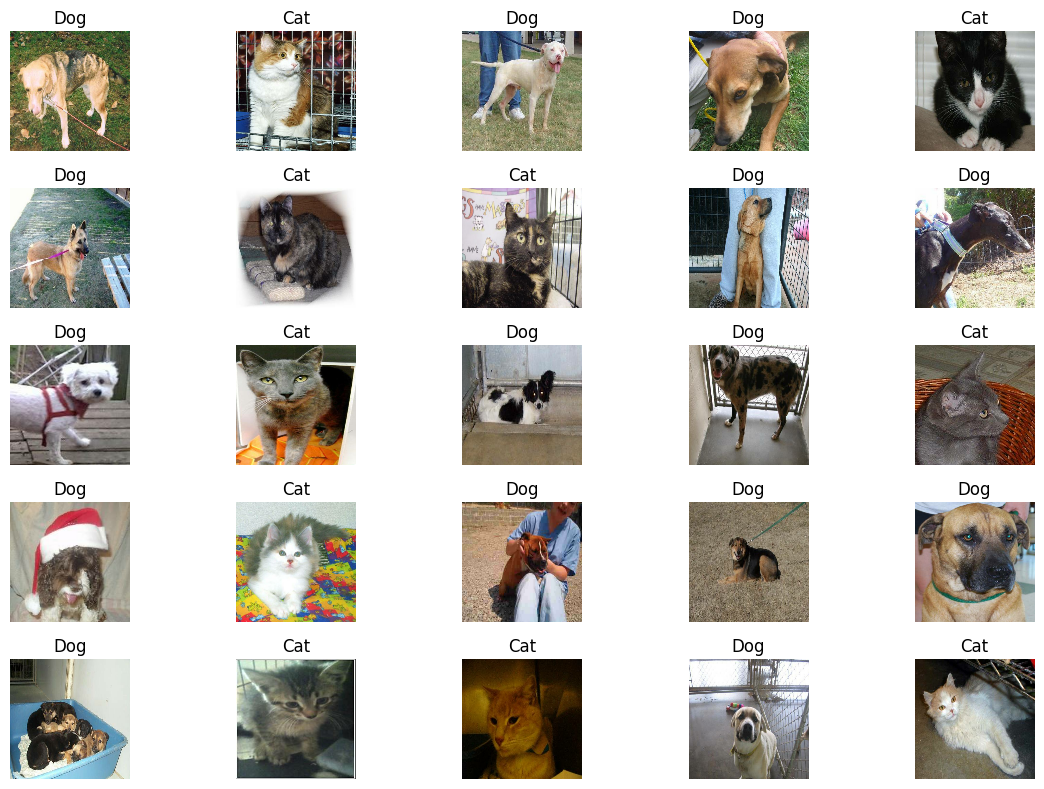

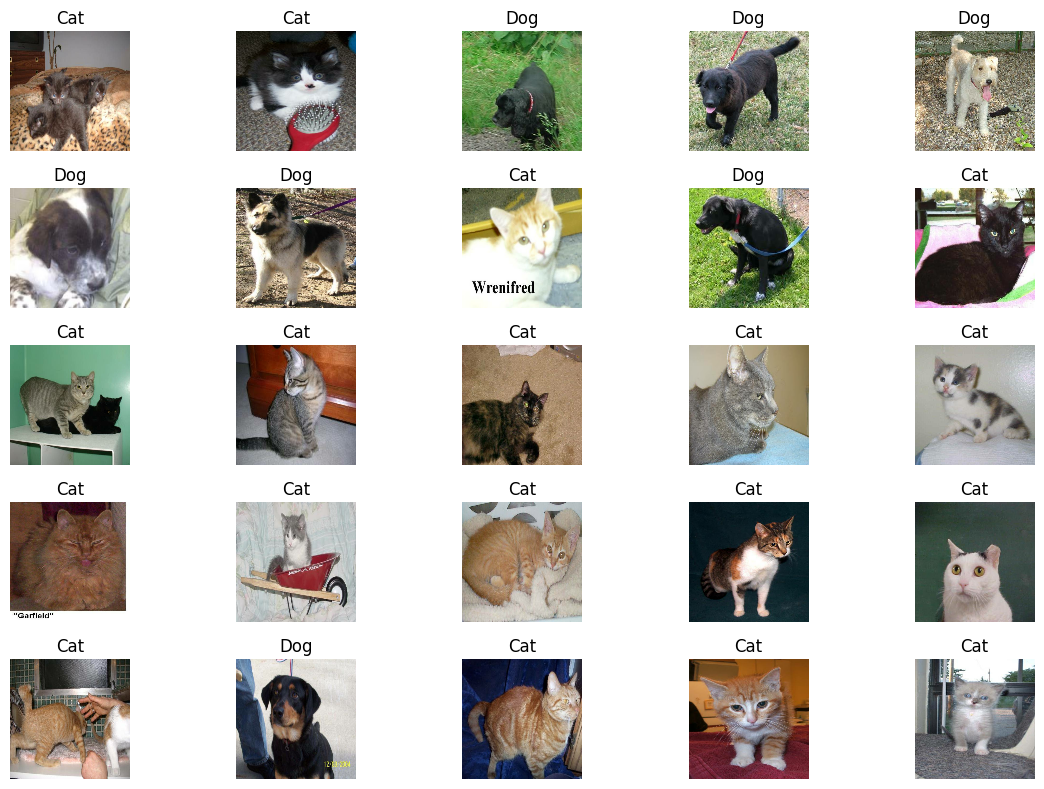

In [10]:
for img,label in train_data_final.take(2): # It will take the first batch_size
    pos = 1
    plt.figure(figsize=(12,8))
    for i,l in zip(img,label): #Iterate through it
        plt.subplot(5,5,pos)
        plt.imshow(i.numpy().astype("uint8"))
        plt.title(name[int(l.numpy().item())])
        plt.axis('off')
        pos+=1
    plt.tight_layout()
    plt.show()

In [11]:
train_data.element_spec

(TensorSpec(shape=(None, 120, 120, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))

In [12]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(120,120,3)),
    tf.keras.layers.Rescaling(1/255),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3)),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 118, 118, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 59, 59, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 57, 57, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 19, 19, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 23104)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    11,829,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,901,377 (45.40 MB)

 Trainable params: 11,901,377 (45.40 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs=None):
        if logs['accuracy'] > 0.95 and logs['loss'] < 0.15:
            self.model.stop_training = True

In [15]:
history = cnn.fit(train_data_final,epochs=5,validation_data=validation_data_final,callbacks=[CustomCallback()])

Epoch 1/5
278/800 ━━━━━━━━━━━━━━━━━━━━ 3:38 418ms/step - accuracy: 0.5756 - loss: 0.8242

KeyboardInterrupt: 

**Plot Loss**

In [102]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()
    
    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()
    
    plt.show()

plot_loss_acc(history)

NameError: name 'history' is not defined

## **Data Augumentation**

Image Augumentation
* Rotation Flip
* Rotation Roatation
* Random Transformation
* Random Zoom

In [81]:
data_agumentation = tf.keras.Sequential([
    tf.keras.Input(shape=(120,120,3)),
    tf.keras.layers.RandomFlip('horizondal'),
    tf.keras.layers.RandomRotation(0.2,fill_mode='nearest'),
    tf.keras.layers.RandomTranslation(0.2,0.2,fill_mode='nearest'),
    tf.keras.layers.RandomZoom(0.2,fill_mode='nearest')
])

In [83]:
cnn_augmented = tf.keras.Sequential([
    data_agumentation,
    cnn
])

In [87]:
cnn_augmented.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),loss='binary_crossentropy',metrics=['accuracy'])

In [88]:
cnn_augmented.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ (None, 120, 120, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 1)              │    11,901,377 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,901,377 (45.40 MB)

 Trainable params: 11,901,377 (45.40 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
cnn_augmented.fit(train_data_final,epochs=5,callbacks=[CustomCallback()],validation_data=validation_data_final)

NameError: name 'cnn_augmented' is not defined